In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
df=pd.read_csv(r"C:\Users\aksha\Downloads\archive (1)\news_dataset.csv")
df.head(10)

,label,text
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...
1,FAKE,A four-minute-long video of a woman criticisin...
2,FAKE,"Republic Poll, a fake Twitter account imitatin..."
3,REAL,"Delhi teen finds place on UN green list, turns..."
4,REAL,Delhi: A high-level meeting underway at reside...
5,REAL,ROME: Novak Djokovic knows it isn't model beha...
6,FAKE,A viral image showing controversial Islamic pr...
7,FAKE,Several photos are being shared with the misle...
8,FAKE,The driver of the DMU train Arvind Kumar has N...
9,FAKE,An old video of a Dassault Rafale aircraft's s...


In [3]:
#creating new column class with 0/1
df["class"]=0
df.head(10)

,label,text,class
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...,0
1,FAKE,A four-minute-long video of a woman criticisin...,0
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",0
3,REAL,"Delhi teen finds place on UN green list, turns...",0
4,REAL,Delhi: A high-level meeting underway at reside...,0
5,REAL,ROME: Novak Djokovic knows it isn't model beha...,0
6,FAKE,A viral image showing controversial Islamic pr...,0
7,FAKE,Several photos are being shared with the misle...,0
8,FAKE,The driver of the DMU train Arvind Kumar has N...,0
9,FAKE,An old video of a Dassault Rafale aircraft's s...,0


In [4]:
#marking class=1 for 'real' labels
df['class'] = df['label'].apply(lambda x: 1 if x == 'REAL' else 0)
df.head(10)

,label,text,class
0,REAL,Payal has accused filmmaker Anurag Kashyap of ...,1
1,FAKE,A four-minute-long video of a woman criticisin...,0
2,FAKE,"Republic Poll, a fake Twitter account imitatin...",0
3,REAL,"Delhi teen finds place on UN green list, turns...",1
4,REAL,Delhi: A high-level meeting underway at reside...,1
5,REAL,ROME: Novak Djokovic knows it isn't model beha...,1
6,FAKE,A viral image showing controversial Islamic pr...,0
7,FAKE,Several photos are being shared with the misle...,0
8,FAKE,The driver of the DMU train Arvind Kumar has N...,0
9,FAKE,An old video of a Dassault Rafale aircraft's s...,0


In [5]:
#to check for null/missing values in all the rows
df.isnull().sum()

label    0
text     8
class    0
dtype: int64

In [6]:
#dropping rows which have missing values and store data into new dataframe
new_df = df.dropna(axis = 0, how ='any')
new_df.isnull().sum()

label    0
text     0
class    0
dtype: int64

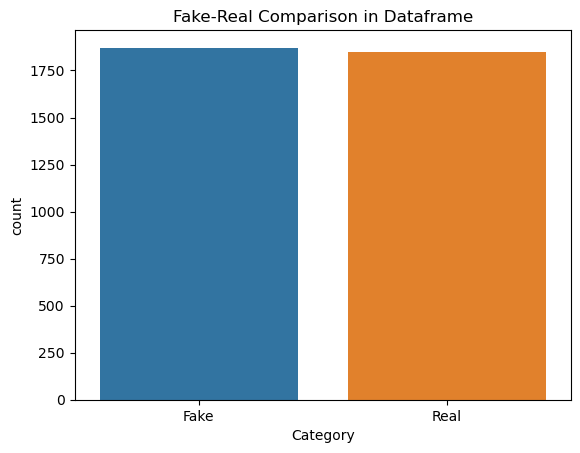

In [7]:
#visualization
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x="class",data=new_df)
plt.title("Fake-Real Comparison in Dataframe")
plt.xlabel("Category")
plt.xticks([0, 1], ["Fake", "Real"])
plt.show()

In [10]:
#text processing function-wordopt
import re
import string
def wordopt(text):
    if isinstance(text, str): #only process strings and not other data types
        text = text.lower()
        text = re.sub(r'\[.*?\]', '', text)
        text = re.sub(r'\\W', ' ', text)
        text = re.sub(r'https?://\S+|www\.\S+', '', text)
        text = re.sub(r'<.*?>', '', text)
        text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub(r'\n', ' ', text)
        text = re.sub(r'\w*\d\w*', '', text)
    return text

In [11]:
#applying wordopt to our dataset
new_df["text"] = new_df["text"].apply(wordopt)

In [12]:
#splitting data for training and testing
x = new_df["text"]
y = new_df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
#transform text data into TF-IDF (Term Frequency-Inverse Document Frequency)
#This is a common step in natural language processing (NLP)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [14]:
#applying linear regression model to the vectorizations
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)

In [15]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       373

    accuracy                           1.00       745
   macro avg       1.00      1.00      1.00       745
weighted avg       1.00      1.00      1.00       745



In [16]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing():
    news= input()
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)

    return print("\nPrediction: {}".format(output_label(pred_LR[0])))

In [17]:
'''from flask import Flask, request, render_template
import pandas as pd # Make sure to import necessary libraries
app = Flask(__name__)
def output_label(n):
 if n == 0:
 return "Fake News"
 elif n == 1:
 return "Not A Fake News"
def manual_testing(news):
 # Assuming wordopt and vectorization are defined somewhere in your code
 testing_news = {"text": [news]}
 new_def_test = pd.DataFrame(testing_news)
 new_def_test["text"] = new_def_test["text"].apply(wordopt)
 new_x_test = new_def_test["text"]
 new_xv_test = vectorization.transform(new_x_test)
 pred_LR = LR.predict(new_xv_test)
 return output_label(pred_LR[0])
@app.route('/', methods=['GET', 'POST'])
def index():
 if request.method == 'POST':
 news = request.form['news']
 prediction = manual_testing(news)
 return render_template('index.html', prediction=prediction)
 return render_template('index.html', prediction=None)
if __name__ == '__main__':
 app.run(debug=True)
'''

'from flask import Flask, request, render_template\nimport pandas as pd # Make sure to import necessary libraries\napp = Flask(__name__)\ndef output_label(n):\n if n == 0:\n return "Fake News"\n elif n == 1:\n return "Not A Fake News"\ndef manual_testing(news):\n # Assuming wordopt and vectorization are defined somewhere in your code\n testing_news = {"text": [news]}\n new_def_test = pd.DataFrame(testing_news)\n new_def_test["text"] = new_def_test["text"].apply(wordopt)\n new_x_test = new_def_test["text"]\n new_xv_test = vectorization.transform(new_x_test)\n pred_LR = LR.predict(new_xv_test)\n return output_label(pred_LR[0])\n@app.route(\'/\', methods=[\'GET\', \'POST\'])\ndef index():\n if request.method == \'POST\':\n news = request.form[\'news\']\n prediction = manual_testing(news)\n return render_template(\'index.html\', prediction=prediction)\n return render_template(\'index.html\', prediction=None)\nif __name__ == \'__main__\':\n app.run(debug=True)\n'

In [18]:
manual_testing()

India GDP growth in Q2 FY24 beats estimates at 9.6%

Prediction: Not A Fake News
